# Step 1: Installation and Setup

In [1]:
! pip install tensorflow

In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.17.0


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Data Preprocessing

In [5]:
# importing the libraries
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [6]:
# loading the dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words= 20000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [7]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 82

In [9]:
# apply padding
x_train = pad_sequences(x_train, maxlen=100)
x_test = pad_sequences(x_test, maxlen= 100)

In [10]:
x_train.shape, x_test.shape

((25000, 100), (25000, 100))

# Step 3: Building the model

In [11]:
# Define an object (initilizing RNN)

model = tf.keras.models.Sequential()

In [12]:
# Embedding layer
model.add(tf.keras.layers.Embedding(input_dim=20000, output_dim= 128, input_shape=(100,)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
# LSTM layer
model.add(tf.keras.layers.LSTM(units=128, activation ='tanh'))

In [15]:
# Output layer
model.add(tf.keras.layers.Dense(units=1, activation ='sigmoid'))

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 128)            │       2,560,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,691,713 (10.27 MB)

 Trainable params: 2,691,713 (10.27 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# compile the model
model.compile(optimizer='rmsprop', loss ='binary_crossentropy', metrics = ['accuracy'])

# Step 4: Training the model

In [18]:
history = model.fit(x_train, y_train, batch_size=128, epochs = 5, validation_data= (x_test,y_test))

Epoch 1/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 106s 527ms/step - accuracy: 0.6085 - loss: 0.6420 - val_accuracy: 0.8004 - val_loss: 0.4381
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 161s 627ms/step - accuracy: 0.8231 - loss: 0.4025 - val_accuracy: 0.8361 - val_loss: 0.3779
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 131s 672ms/step - accuracy: 0.8652 - loss: 0.3280 - val_accuracy: 0.8028 - val_loss: 0.4399
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 131s 670ms/step - accuracy: 0.8828 - loss: 0.2890 - val_accuracy: 0.8101 - val_loss: 0.4312
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 122s 567ms/step - accuracy: 0.8998 - loss: 0.2536 - val_accuracy: 0.8554 - val_loss: 0.3464


In [19]:
# predictions
y_pred_prob = model.predict(x_test)

# Apply threshold to convert probabilities to class labels (0 or 1)
y_pred = (y_pred_prob > 0.5).astype("int32")

782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 66ms/step


In [20]:
print(y_pred[0]), print(y_test[0])

[0]
0


(None, None)

In [21]:
# confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

In [22]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.85536


# Step 5: Learning Curve

In [23]:
def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

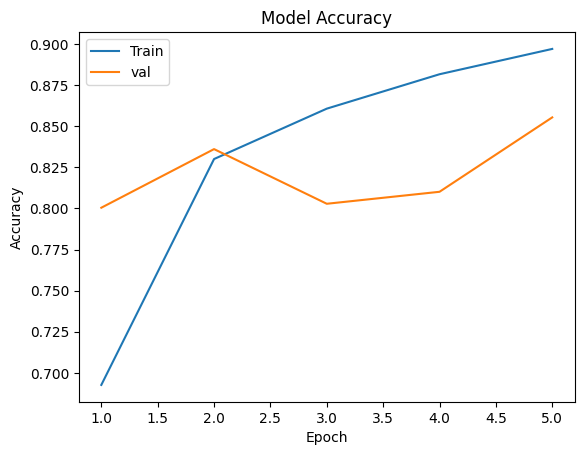

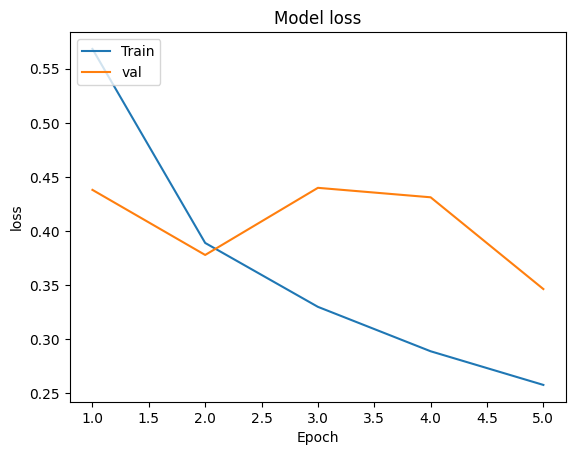

In [24]:
learning_curve(history, 5)